## Data Science Capstone Project

This notebook will be mainly used for IBM Data Science Capstone project

In [93]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading Data and creatinf initial Dataset

In [2]:
# Downloading dataset from Google Drive
!wget -O Data-Collisions.csv 'https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO'

--2020-09-25 01:53:39--  https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO
Resolving drive.google.com (drive.google.com)... 172.217.1.238, 2607:f8b0:4000:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.1.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download [following]
--2020-09-25 01:53:43--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 172.217.9.1, 2607:f8b0:4000:806::2001
Connecting to doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googl

In [94]:
#Reading initial dataset
initial_df = pd.read_csv('Data-Collisions.csv')
initial_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Cleaning Data - removing all non-relevant records

In [95]:
# First - remove all empty rows, if any
initial_df = initial_df.dropna(how = 'all')

# Remove all duplicates
initial_df.drop_duplicates()

# Replacing all NaN values by 0
initial_df = initial_df.fillna(0)

# Removing all non-vehicle cases
initial_df.drop(initial_df[initial_df['VEHCOUNT'] < 1].index, inplace = True)

initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] == 2) | (initial_df['SDOT_COLCODE'] > 29)].index)
initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] > 4) & (initial_df['SDOT_COLCODE'] < 10)].index)

# Removing all cases with one parked vehicle
initial_df = initial_df.drop(initial_df[(initial_df['VEHCOUNT'] == 1) & (initial_df['HITPARKEDCAR'] == 'Y')].index)

# Removing all cases related to driver influence (not related to Weather)
initial_df = initial_df.drop(initial_df[(initial_df['UNDERINFL'] == 1) | (initial_df['UNDERINFL']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['INATTENTIONIND'] == 1) | (initial_df['INATTENTIONIND']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['SPEEDING'] == 1) | (initial_df['SPEEDING']== 'Y')].index)

# Remove Unknown weather conditions
initial_df.drop(initial_df[initial_df['WEATHER'] == 'Unknown'].index, inplace = True)
initial_df.drop(initial_df[initial_df['WEATHER'] == 0].index, inplace = True)
initial_df.drop(initial_df[initial_df['ROADCOND'] == 'Unknown'].index, inplace = True)
initial_df.drop(initial_df[initial_df['ROADCOND'] == 0].index, inplace = True)
initial_df.drop(initial_df[initial_df['LIGHTCOND'] == 'Unknown'].index, inplace = True)
initial_df.drop(initial_df[initial_df['LIGHTCOND'] == 0].index, inplace = True)

# Look at the prepared initial dataset shape
initial_df.shape

(127709, 38)

In [96]:
# Remove all unnecessary columns
initial_df = initial_df.drop(['X',
                              'Y',
                              'INCKEY',
                              'COLDETKEY',
                              'REPORTNO',
                              'STATUS',
                              'INTKEY',
                              'LOCATION',
                              'PEDROWNOTGRNT',
                              'SDOTCOLNUM',
                              'SEGLANEKEY',
                              'CROSSWALKKEY',
                              'EXCEPTRSNCODE',
                              'EXCEPTRSNDESC',
                              'SEVERITYDESC',
                              'SEVERITYCODE.1',
                              'ST_COLDESC',
                              'SDOT_COLDESC',
                              'INCDATE',
                              'ST_COLCODE',
                              'JUNCTIONTYPE',
                              'COLLISIONTYPE',
                              'INATTENTIONIND',
                              'SPEEDING',
                              'UNDERINFL',
                              'VEHCOUNT',
                              'PEDCYLCOUNT',
                              'PEDCOUNT',
                              'PERSONCOUNT',
                              'ADDRTYPE',
                              'OBJECTID',
                              'HITPARKEDCAR',
                              'SDOT_COLCODE'], 1)

initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


## Data Analysis
Let's look at the incidents per hour  
For that purpose we will change Date and Time of incidents to Hour of the day only and also will update AM / PM to 24 hours.

In [97]:
# Removing Date and moving to 24 hours
initial_df['INCDTTM'] = initial_df.INCDTTM.str.split(' ')

def change_time(column):
    if isinstance(column, list) and len(column) == 3:
        time = column[1].split(':')[0]
        if column[2] == 'PM' and time != '12':
            time = str(int(time) + 12)
        if column[2] == 'AM' and time == '12':
            time = '0'
        column = time
    if isinstance(column, list) and len(column) < 3:
        column = str(25)
    return int(column)

initial_df['INCDTTM'] = initial_df['INCDTTM'].apply(lambda x: change_time(x))

# Let's look at the updated dataset
initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,14,Overcast,Wet,Daylight
1,1,18,Raining,Wet,Dark - Street Lights On
2,1,10,Overcast,Dry,Daylight
3,1,9,Clear,Dry,Daylight
4,2,8,Raining,Wet,Daylight


### Let's look at the average hours of incidents per day

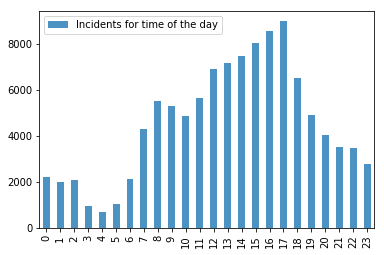

In [98]:
# Let's look at the time of incidents per day
timeoftheday_df = initial_df
timeoftheday_df.drop(timeoftheday_df[timeoftheday_df['INCDTTM'] == 25].index, inplace = True)
# timeoftheday_df.hist(column='INCDTTM', bins=23)
# ax.legend(['Time of the day'])


# ax7 = timeoftheday_overcast_df.plot(kind='hist', bins=47, alpha=0.8)
#     ax7.legend([weather]);

order = [i for i in range(0,24)]
ax = timeoftheday_df.INCDTTM.value_counts().loc[order].plot(kind='bar', alpha=0.8)
ax.legend(['Incidents for time of the day'])

In [71]:
timeoftheday_df.WEATHER.value_counts()

Clear                       70567
Raining                     20481
Overcast                    17109
Snowing                       503
Fog/Smog/Smoke                353
Other                         167
Sleet/Hail/Freezing Rain       64
Blowing Sand/Dirt              31
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

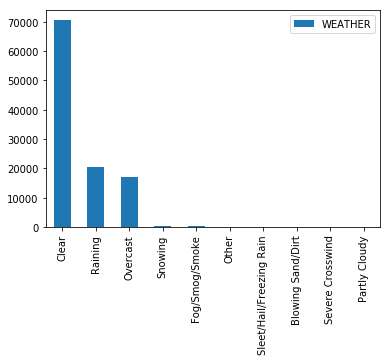

In [99]:
a1 = timeoftheday_df.WEATHER.value_counts().plot(kind='bar')
a1.legend(['WEATHER'])

In [72]:
timeoftheday_df.ROADCOND.value_counts()

Dry               78937
Wet               29067
Ice                 611
Snow/Slush          492
Other                61
Oil                  46
Sand/Mud/Dirt        44
Standing Water       42
Name: ROADCOND, dtype: int64

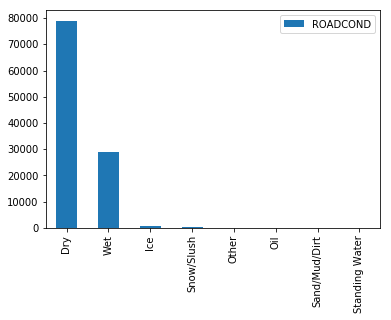

In [100]:
a2 = timeoftheday_df.ROADCOND.value_counts().plot(kind='bar')
a2.legend(['ROADCOND'])

In [74]:
timeoftheday_df.LIGHTCOND.value_counts()

Daylight                    73557
Dark - Street Lights On     28858
Dusk                         3648
Dawn                         1511
Dark - No Street Lights       908
Dark - Street Lights Off      675
Other                         135
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

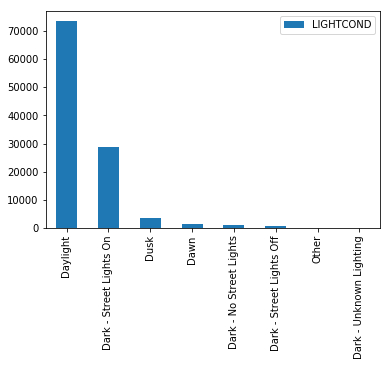

In [101]:
a3 = timeoftheday_df.LIGHTCOND.value_counts().plot(kind='bar')
a3.legend(['LIGHTCOND'])

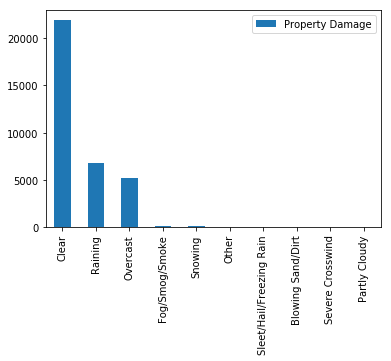

In [103]:
super_1_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_1_df.drop(super_1_df[super_1_df['SEVERITYCODE'] == 1].index, inplace = True)
a4 = super_1_df.WEATHER.value_counts().plot(kind='bar')
a4.legend(['Property Damage'])

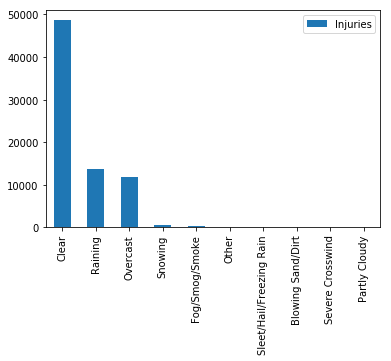

In [104]:
super_2_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_2_df.drop(super_2_df[super_2_df['SEVERITYCODE'] == 2].index, inplace = True)
a5 = super_2_df.WEATHER.value_counts().plot(kind='bar')
a5.legend(['Injuries'])

Severity Code for Raining weather conditions


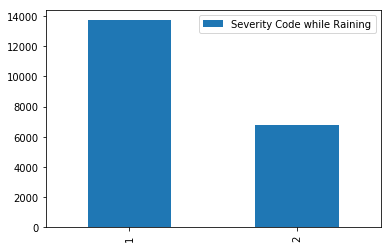

In [105]:
super_3_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_3_df.drop(super_3_df[super_3_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Severity Code for Raining weather conditions')
ax2 = super_3_df.SEVERITYCODE.value_counts().plot(kind='bar')
ax2.legend(['Severity Code while Raining'])

Light Conditions for Raining weather conditions


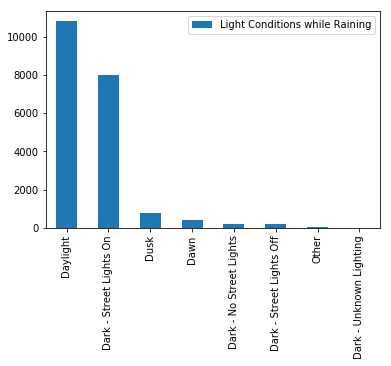

In [106]:
super_4_df = timeoftheday_df[['LIGHTCOND', 'WEATHER']]
super_4_df.drop(super_4_df[super_4_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Light Conditions for Raining weather conditions')
ax3 = super_4_df.LIGHTCOND.value_counts().plot(kind='bar')
ax3.legend(['Light Conditions while Raining'])

Road Conditions for Raining weather conditions


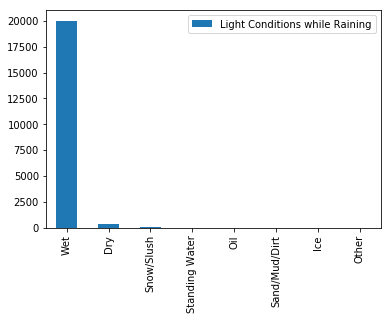

In [107]:
super_5_df = timeoftheday_df[['ROADCOND', 'WEATHER']]
super_5_df.drop(super_5_df[super_5_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Road Conditions for Raining weather conditions')
ax4 = super_5_df.ROADCOND.value_counts().plot(kind='bar')
ax4.legend(['Light Conditions while Raining'])

Road Conditions for Snowing weather conditions


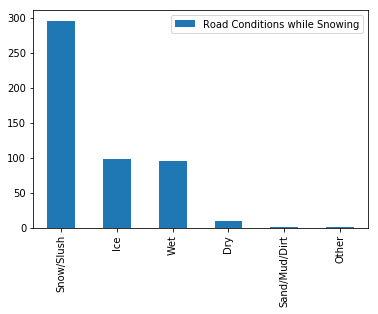

In [109]:
super_5_df = timeoftheday_df[['ROADCOND', 'WEATHER']]
super_5_df.drop(super_5_df[super_5_df['WEATHER'] != 'Snowing'].index, inplace = True)
print('Road Conditions for Snowing weather conditions')
ax5 = super_5_df.ROADCOND.value_counts().plot(kind='bar')
ax5.legend(['Road Conditions while Snowing'])

In [111]:
timeoftheday_df.shape

(109300, 5)

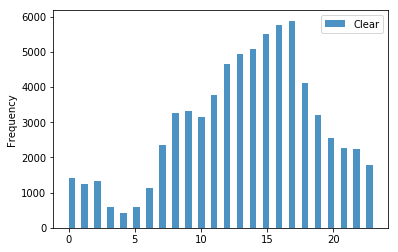

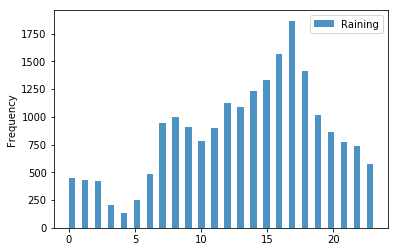

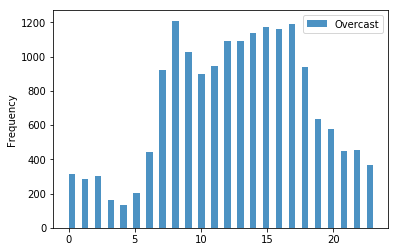

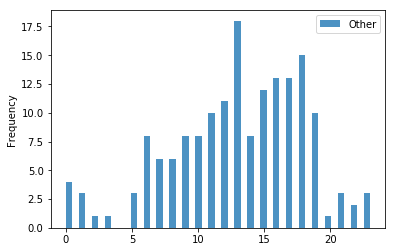

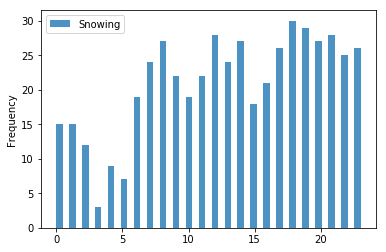

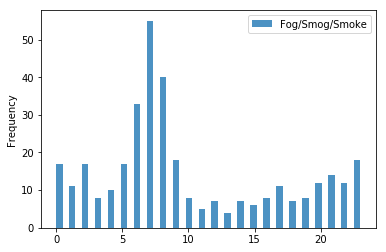

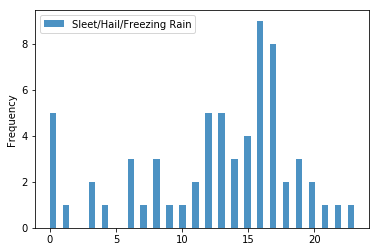

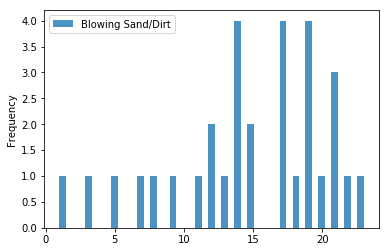

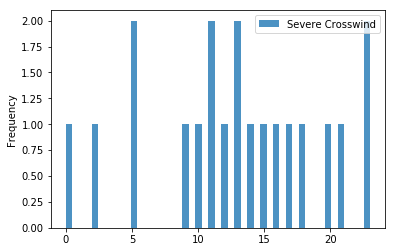

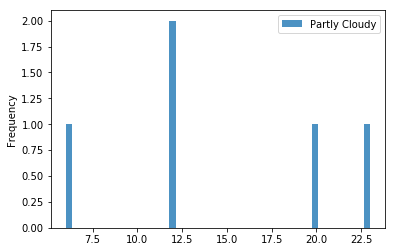

In [110]:
# Let's look at the incident time for each weather
timeoftheday_weather_df = timeoftheday_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast', 'Other', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy']:
    timeoftheday_overcast_df = timeoftheday_weather_df
    timeoftheday_overcast_df = timeoftheday_overcast_df[timeoftheday_overcast_df['WEATHER'] == weather]
    ax7 = timeoftheday_overcast_df.plot(kind='hist', bins=47, alpha=0.8)
    ax7.legend([weather])

## Preparing Data - update Dataset for the balanced one

Let's look at the counts of our data

In [85]:
initial_df.SEVERITYCODE.value_counts()

1    75123
2    34177
Name: SEVERITYCODE, dtype: int64

Now we could use Oversampling (Up-sampling) of the minority cases, so our dataset would be ballanced

In [86]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = initial_df[initial_df['SEVERITYCODE'] == 1]
df_minority = initial_df[initial_df['SEVERITYCODE'] == 2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,        # sample with replacement
                                 n_samples=75123,     # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

Let's look at the ballanced dataset

In [87]:
 
# Display new class counts
df_balanced.SEVERITYCODE.value_counts()

2    75123
1    75123
Name: SEVERITYCODE, dtype: int64

### Now our dataset is perfectly balanced!

## Label encoding

In [199]:
X = df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [198]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Overcast','Raining', 'Clear', 'Unknown', 'Other', 'Snowing'])
X[:,1] = le_weather.transform(X[:,1]) 


# le_BP = preprocessing.LabelEncoder()
# le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
# X[:,2] = le_BP.transform(X[:,2])


# le_Chol = preprocessing.LabelEncoder()
# le_Chol.fit([ 'NORMAL', 'HIGH'])
# X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

ValueError: y contains previously unseen labels: 0

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [147]:
initial_df.shape

(145501, 6)